In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

Original DataSet

In [2]:
foodData = pd.read_csv('food.csv')
foodData

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,FROG LEGS,"FROG LEGS,RAW",80200,0,1.40,0,0,0.00,50,65,...,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1
7409,MACKEREL,"MACKEREL,SALTED",83110,0,13.40,0,0,0.00,95,95,...,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8
7410,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",90240,0,3.06,0,0,0.00,53,81,...,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2
7411,SNAIL,"SNAIL,RAW",90560,0,1.30,0,0,2.00,50,65,...,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1


In [3]:
foodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

The dataset we currently have has 48 columns, mainly filled with macronutrient variables, and categorical variables Category and Description.

Check for any NULL values

In [4]:
foodData.isnull().sum()

Category                                                      0
Description                                                   0
Nutrient Data Bank Number                                     0
Data.Alpha Carotene                                           0
Data.Ash                                                      0
Data.Beta Carotene                                            0
Data.Beta Cryptoxanthin                                       0
Data.Carbohydrate                                             0
Data.Cholesterol                                              0
Data.Choline                                                  0
Data.Fiber                                                    0
Data.Kilocalories                                             0
Data.Lutein and Zeaxanthin                                    0
Data.Lycopene                                                 0
Data.Manganese                                                0
Data.Niacin                             

In [5]:
foodData.isna().sum()

Category                                                      0
Description                                                   0
Nutrient Data Bank Number                                     0
Data.Alpha Carotene                                           0
Data.Ash                                                      0
Data.Beta Carotene                                            0
Data.Beta Cryptoxanthin                                       0
Data.Carbohydrate                                             0
Data.Cholesterol                                              0
Data.Choline                                                  0
Data.Fiber                                                    0
Data.Kilocalories                                             0
Data.Lutein and Zeaxanthin                                    0
Data.Lycopene                                                 0
Data.Manganese                                                0
Data.Niacin                             

Removing the rows with missing values

In [6]:
foodData.shape

(7413, 48)

In [7]:
foodData = foodData.dropna(axis = 1)

In [8]:
foodData.shape

(7413, 46)

In [9]:
foodData.Category.nunique()

1183

Many types of "Category"

In [10]:
foodData['Category'].value_counts()

BEEF                                               457
PORK                                               304
CEREALS RTE                                        291
BABYFOOD                                           221
LAMB                                               198
                                                  ... 
LOMA LINDA BIG FRANKS                                1
ARUGULA                                              1
MORNINGSTAR FARMS SAUSAGE STYLE RECIPE CRUMBLES      1
WEIGHT WATCHERS SMART ONES                           1
WINE                                                 1
Name: Category, Length: 1183, dtype: int64

The category with the most number of items is Beef, followed by pork etc. This shows that the size of different categories vary by a lot, from 457 count to 1. Hence, when doing EDA, we cannot rank them based on their count.

In [11]:
foodData.describe()

,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Kilocalories,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
count,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,...,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000
mean,14116.443680,21.210711,1.852459,159.043437,8.776744,21.785381,37.162822,20.673546,1.993147,219.655875,...,268.348172,331.590719,1.875125,767.568191,99.437070,1.172903,0.269547,9.075651,0.842837,9.448604
std,8767.416214,269.714183,2.993228,1126.285026,154.184860,27.123491,119.738438,45.481990,4.292873,171.668713,...,404.916220,977.046544,4.193682,3871.307652,761.653061,4.512816,0.565116,63.443284,4.169756,66.067619
min,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8121.000000,0.000000,0.830000,0.000000,0.000000,0.490000,0.000000,0.000000,0.000000,82.000000,...,103.000000,31.000000,0.190000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000
50%,12539.000000,0.000000,1.240000,0.000000,0.000000,9.290000,2.000000,0.000000,0.300000,181.000000,...,210.000000,86.000000,0.770000,33.000000,0.000000,0.010000,0.110000,0.000000,0.050000,0.000000
75%,18424.000000,0.000000,2.200000,1.000000,0.000000,30.590000,60.000000,20.000000,2.300000,331.000000,...,328.000000,428.000000,2.460000,280.000000,24.000000,0.830000,0.330000,3.500000,0.390000,1.700000
max,93600.000000,14251.000000,99.800000,42891.000000,7923.000000,100.000000,3100.000000,1388.000000,79.000000,902.000000,...,16500.000000,38758.000000,181.610000,100000.000000,30000.000000,98.890000,12.000000,2400.000000,149.400000,1714.500000


In [12]:
foodData.columns

Index(['Category', 'Description', 'Nutrient Data Bank Number',
       'Data.Alpha Carotene', 'Data.Ash', 'Data.Beta Carotene',
       'Data.Beta Cryptoxanthin', 'Data.Carbohydrate', 'Data.Cholesterol',
       'Data.Choline', 'Data.Fiber', 'Data.Kilocalories',
       'Data.Lutein and Zeaxanthin', 'Data.Lycopene', 'Data.Manganese',
       'Data.Niacin', 'Data.Pantothenic Acid', 'Data.Protein',
       'Data.Refuse Percentage', 'Data.Retinol', 'Data.Riboflavin',
       'Data.Selenium', 'Data.Sugar Total', 'Data.Thiamin', 'Data.Water',
       'Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat',
       'Data.Fat.Saturated Fat', 'Data.Fat.Total Lipid',
       'Data.Household Weights.1st Household Weight',
       'Data.Household Weights.2nd Household Weight',
       'Data.Major Minerals.Calcium', 'Data.Major Minerals.Copper',
       'Data.Major Minerals.Iron', 'Data.Major Minerals.Magnesium',
       'Data.Major Minerals.Phosphorus', 'Data.Major Minerals.Potassium',
       'Data.Major Mi

Lets analyse the Vitamin variables. 

In [13]:
VitaminData = foodData[['Data.Vitamins.Vitamin A - IU','Data.Vitamins.Vitamin A - RAE','Data.Vitamins.Vitamin B12','Data.Vitamins.Vitamin B6',
           'Data.Vitamins.Vitamin C','Data.Vitamins.Vitamin E','Data.Vitamins.Vitamin K']].copy()


In [14]:
VitaminData.describe()

,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
count,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000
mean,767.568191,99.437070,1.172903,0.269547,9.075651,0.842837,9.448604
std,3871.307652,761.653061,4.512816,0.565116,63.443284,4.169756,66.067619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,0.010000,0.110000,0.000000,0.050000,0.000000
75%,280.000000,24.000000,0.830000,0.330000,3.500000,0.390000,1.700000
max,100000.000000,30000.000000,98.890000,12.000000,2400.000000,149.400000,1714.500000


25th percentile is 0.0 for all the variables except a few, where the values are still near to 0.0 . This may be due to the numerous number of items with no vitamins. 

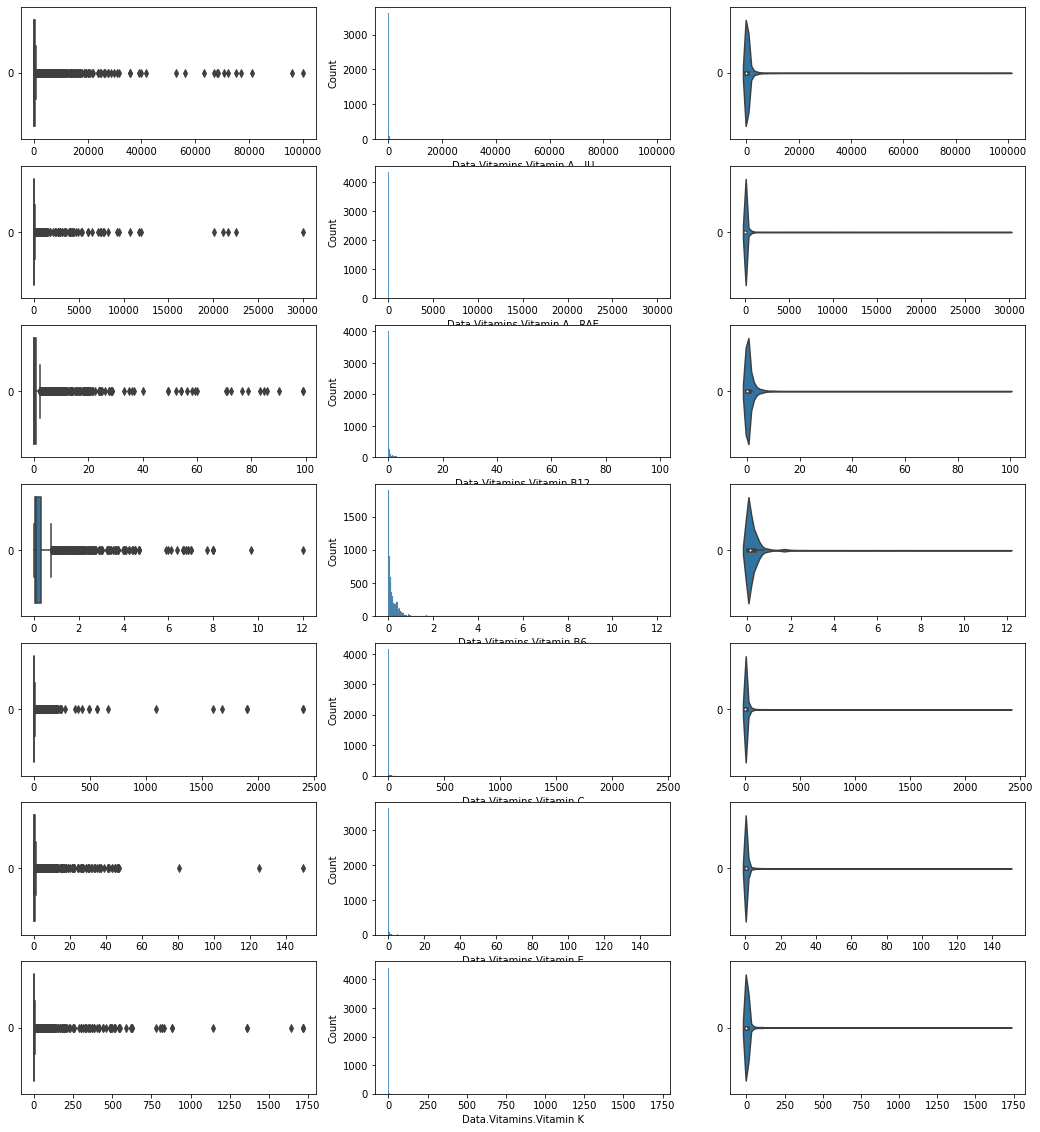

In [15]:
# Draw the distributions of all variables
f, axes = plt.subplots(7, 3, figsize=(18, 20))

count = 0
for var in VitaminData:
    sns.boxplot(data = VitaminData[var], orient = "h", ax = axes[count,0])
    sns.histplot(data = VitaminData[var], ax = axes[count,1])
    sns.violinplot(data = VitaminData[var], orient = "h", ax = axes[count,2])
    count += 1

In [16]:
# Count number of zeros in all columns of VitaminData
for column_name in VitaminData.columns:
    column = VitaminData[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Data.Vitamins.Vitamin A - IU  is :  2684
Count of zeros in column  Data.Vitamins.Vitamin A - RAE  is :  3771
Count of zeros in column  Data.Vitamins.Vitamin B12  is :  3706
Count of zeros in column  Data.Vitamins.Vitamin B6  is :  1237
Count of zeros in column  Data.Vitamins.Vitamin C  is :  3749
Count of zeros in column  Data.Vitamins.Vitamin E  is :  3397
Count of zeros in column  Data.Vitamins.Vitamin K  is :  4233


Let's plot a pairplot between each variables and find out their relationship with one another

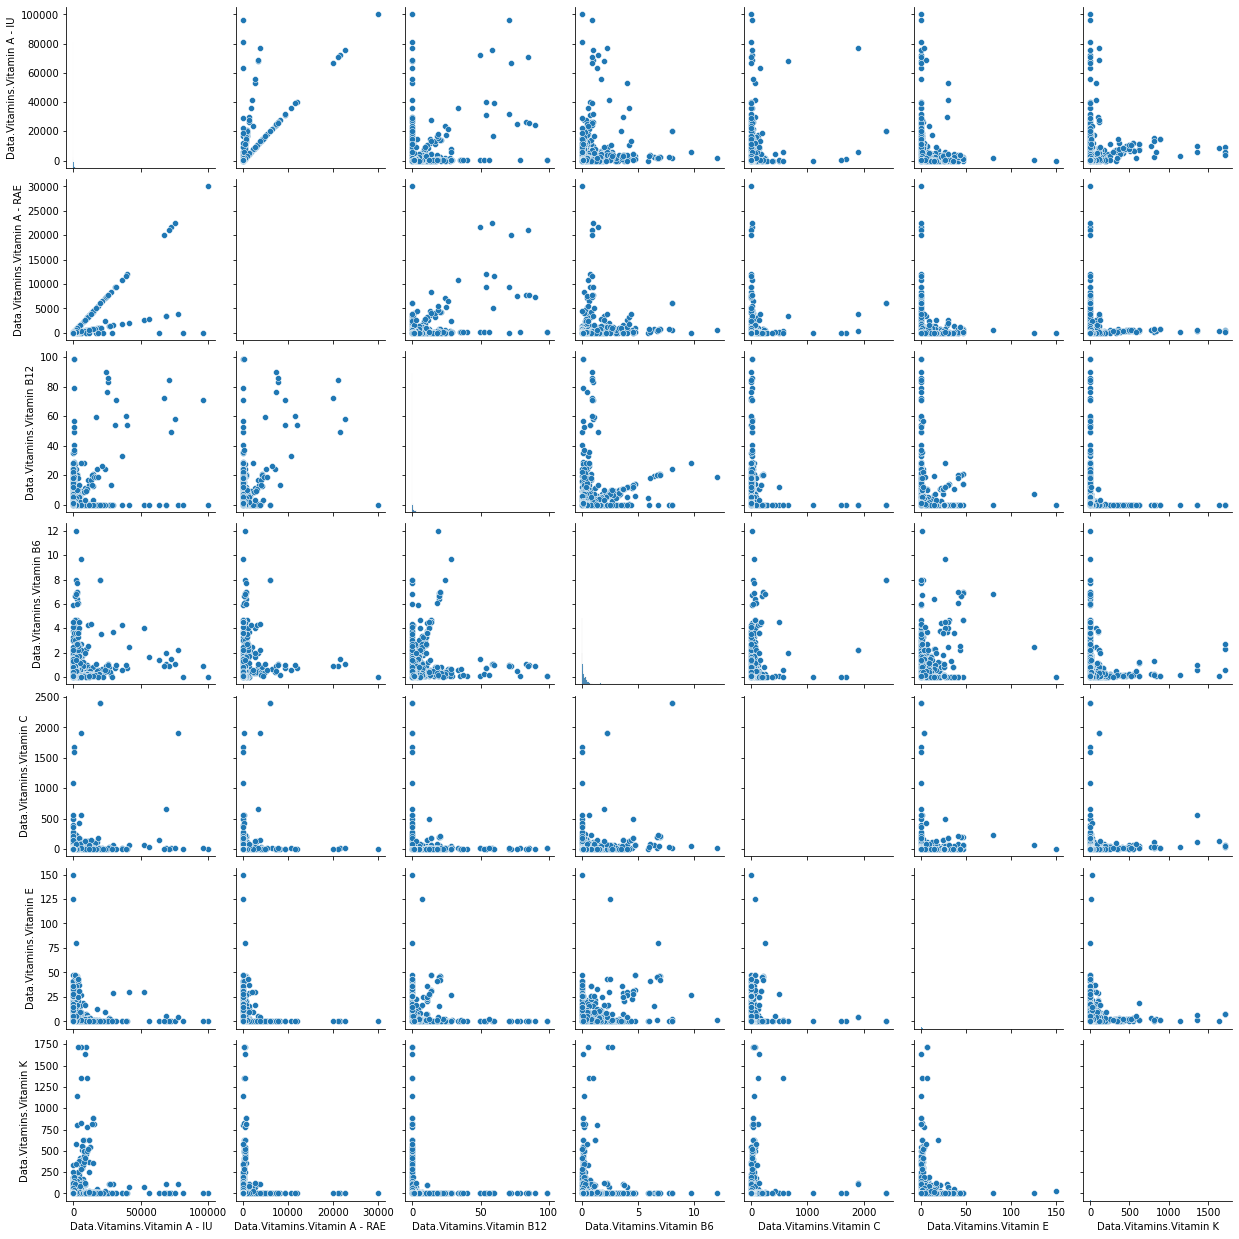

In [17]:
sns.pairplot(data = VitaminData)

Using a correlation matrix will help us see clearer.

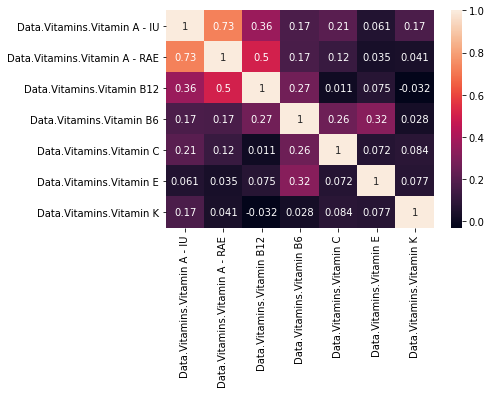

In [18]:
corrMatrix = VitaminData.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

We notice that Vitamin A-IU and Vitamin A-RAE has a very high correlation of 0.73. This is because they are just different measures for vitamin A. 1 IU retinol = 0.3 mcg RAE. 
Another high correlation of 0.5 is between Vitamin B12 and Vitamin A-RAE. 

Would the results be more accurate if we remove items with zero vitamins?

In [19]:
vitamindata2 = VitaminData[(VitaminData != 0).all(1)].copy()
len(vitamindata2)
vitamindata2.describe()

,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,1546.693816,400.039216,3.190075,0.579023,12.502413,2.163439,10.858824
std,6204.518102,1847.049705,9.560179,1.220969,31.161185,7.160115,24.592543
min,2.000000,1.000000,0.010000,0.005000,0.100000,0.010000,0.100000
25%,95.000000,18.500000,0.170000,0.045000,0.600000,0.230000,0.700000
50%,280.000000,59.000000,0.390000,0.098000,1.900000,0.530000,2.500000
75%,1539.000000,293.000000,2.030000,0.376000,12.000000,1.320000,6.600000
max,75333.000000,22600.000000,98.890000,12.000000,489.900000,125.000000,196.700000


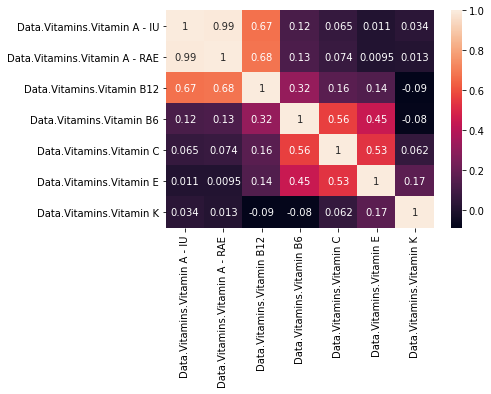

In [20]:
corrMatrix = vitamindata2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Now, we can see that the correlation values have generally increased, showing us a more accurate representation of their relation with one another. Highest correlation is Vitamin A-RAE and A-IU with 0.99, showing they are most probably indeed just different measures for vitamin A. For convenience, we shall only use A-IU to represent vitamin A content. 
Followed by B12 and A with correlations of 0.67 
and C and B6 with 0.56
The correlation between vitamins are generally positive.

Lets find out who are the outliers above the 75 quartile and their categories to find out food that has high vitamin content compared to the rest. We shall obtain all of the rows where any of the vitamin variables has an outlier above the 75 quartile

In [21]:
# Calculate the quartiles
Q1 = vitamindata2.quantile(0.25)
Q3 = vitamindata2.quantile(0.75)

# Rule to identify outliers
rule = ((vitamindata2 <= (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule 

,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
12,True,True,True,True,True,True,True
42,True,True,True,True,True,True,True
48,True,True,True,True,True,True,True
49,True,True,True,True,True,True,True
50,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
7375,True,True,True,True,True,True,True
7379,True,True,True,True,True,True,True
7380,True,True,True,True,True,True,True
7381,True,True,True,True,True,True,True


In [22]:
# Find the rows where ALL column is True
non_outliers = rule.all(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
non_outliers
# Which row indices correspond to outliers in the dataframe?
nonoutlierindices = non_outliers.index[non_outliers == True]
nonoutlierindices

Int64Index([  12,   42,   48,   49,   50,   51,   53,   54,   55,   56,
            ...
            7338, 7340, 7351, 7359, 7360, 7364, 7375, 7379, 7380, 7381],
           dtype='int64', length=419)

We need to copy another dataset with category this time to observe the categories as outliers with high vitamin content compared to other categories.

In [23]:
VitaCat = foodData[['Category','Data.Vitamins.Vitamin A - IU','Data.Vitamins.Vitamin A - RAE','Data.Vitamins.Vitamin B12','Data.Vitamins.Vitamin B6',
           'Data.Vitamins.Vitamin C','Data.Vitamins.Vitamin E','Data.Vitamins.Vitamin K']].copy()
VitaCat2 = VitaCat[(VitaCat != 0).all(1)].copy()
VitaCat2

,Category,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
12,CHEESE,146,38,0.53,0.068,1.4,0.04,0.4
42,CHEESE,1045,248,0.70,0.071,2.3,0.29,2.9
48,CREAM,354,97,0.33,0.039,0.9,0.33,1.3
49,CREAM,656,181,0.22,0.032,0.8,0.55,1.7
50,CREAM,1013,279,0.20,0.028,0.6,0.88,2.7
...,...,...,...,...,...,...,...,...
7375,ENSURE PLUS,497,149,0.60,0.198,11.9,1.34,7.9
7379,BABYFOOD,41,3,0.43,0.400,12.4,0.40,13.3
7380,BABYFOOD,20,3,0.13,0.080,13.9,0.02,0.1
7381,ICE CREAMS,713,201,0.18,0.033,0.5,0.46,1.5


In [24]:
# Remove the outliers based on the row indices obtained above
VitaCat2.drop(axis = 0,               # 0 drops row 1 drops column
                index = nonoutlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
VitaCat2

,Category,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
267,BABYFOOD,878,44,0.15,0.056,0.3,2.62,29.3
276,BABYFOOD,4926,246,0.18,0.063,0.2,0.49,5.2
288,BABYFOOD,4132,207,0.01,0.072,0.1,0.32,3.4
296,BABYFOOD,4396,220,0.02,0.044,0.7,0.30,3.9
297,BABYFOOD,4325,216,0.01,0.052,0.4,0.31,4.8
...,...,...,...,...,...,...,...,...
7259,SALAD DRSNG,41,10,0.26,0.010,0.2,4.60,96.7
7295,BEVERAGE,4987,1496,1.71,1.140,76.9,9.37,90.0
7304,BEVERAGE,8962,2686,3.10,2.000,138.0,16.88,120.0
7326,SALAD DRSNG,211,11,0.09,0.080,8.8,4.00,69.1


In [25]:
VitaCat2['Category'].value_counts()

CEREALS RTE                  95
BABYFOOD                     13
MARGARINE                    13
INF FORM                     12
INF FORMULA                  12
SOUP                          7
SALAD DRSNG                   6
CANDIES                       6
MARGARINE-LIKE SPRD           5
CEREALS                       5
BEEF                          4
No Category                   3
HERRING                       3
CLAM                          3
VEAL                          3
SNACKS                        3
TURKEY                        3
OYSTER                        3
VEGETABLE OIL-BUTTER SPRD     2
Form Bar                      2
MALTED DRK MIX                2
BEVERAGE                      2
CEREALS READY TO EAT          2
INFANT FORMULA                2
OCTOPUS                       2
INF FOR                       2
MACKEREL                      2
CERLS                         1
COD                           1
SARDINE                       1
BUTTER-MARGARINE BLEND        1
LASAGNA 

Category with highest number of occurence is CEREALS RTE(meaning ready-to-eat) with 100. This is in line with our own knowledge, where cereals tend to have many vitamin content. 
There is also BABYFOOD,INF FORMULA and INF FORM, meaning infant formula.
MARGARINE and SOUP also shown to have high vitamin content.
However, we should not compare them using the count as the number of items in each category in the original dataset is different, for example there may be just a lot of items in CEREALS RTE compared to SOUP. 
But through this, we can identify the categories which has high vitamin content compared to other categories. 
We can also identify multiple types of fish such as SALMON, SARDINE, COD and FISH, showing that fish has high vitamin content.

Next, let us compare Mineral variables

In [26]:
MineralData=foodData[['Data.Major Minerals.Calcium','Data.Major Minerals.Copper','Data.Major Minerals.Iron','Data.Major Minerals.Magnesium',
           'Data.Major Minerals.Phosphorus','Data.Major Minerals.Potassium','Data.Major Minerals.Sodium','Data.Major Minerals.Zinc']].copy()

MineralData.describe()
# Count number of zeros in all columns of MineralData
for column_name in MineralData.columns:
    column = MineralData[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Data.Major Minerals.Calcium  is :  391
Count of zeros in column  Data.Major Minerals.Copper  is :  1103
Count of zeros in column  Data.Major Minerals.Iron  is :  366
Count of zeros in column  Data.Major Minerals.Magnesium  is :  986
Count of zeros in column  Data.Major Minerals.Phosphorus  is :  878
Count of zeros in column  Data.Major Minerals.Potassium  is :  649
Count of zeros in column  Data.Major Minerals.Sodium  is :  242
Count of zeros in column  Data.Major Minerals.Zinc  is :  915


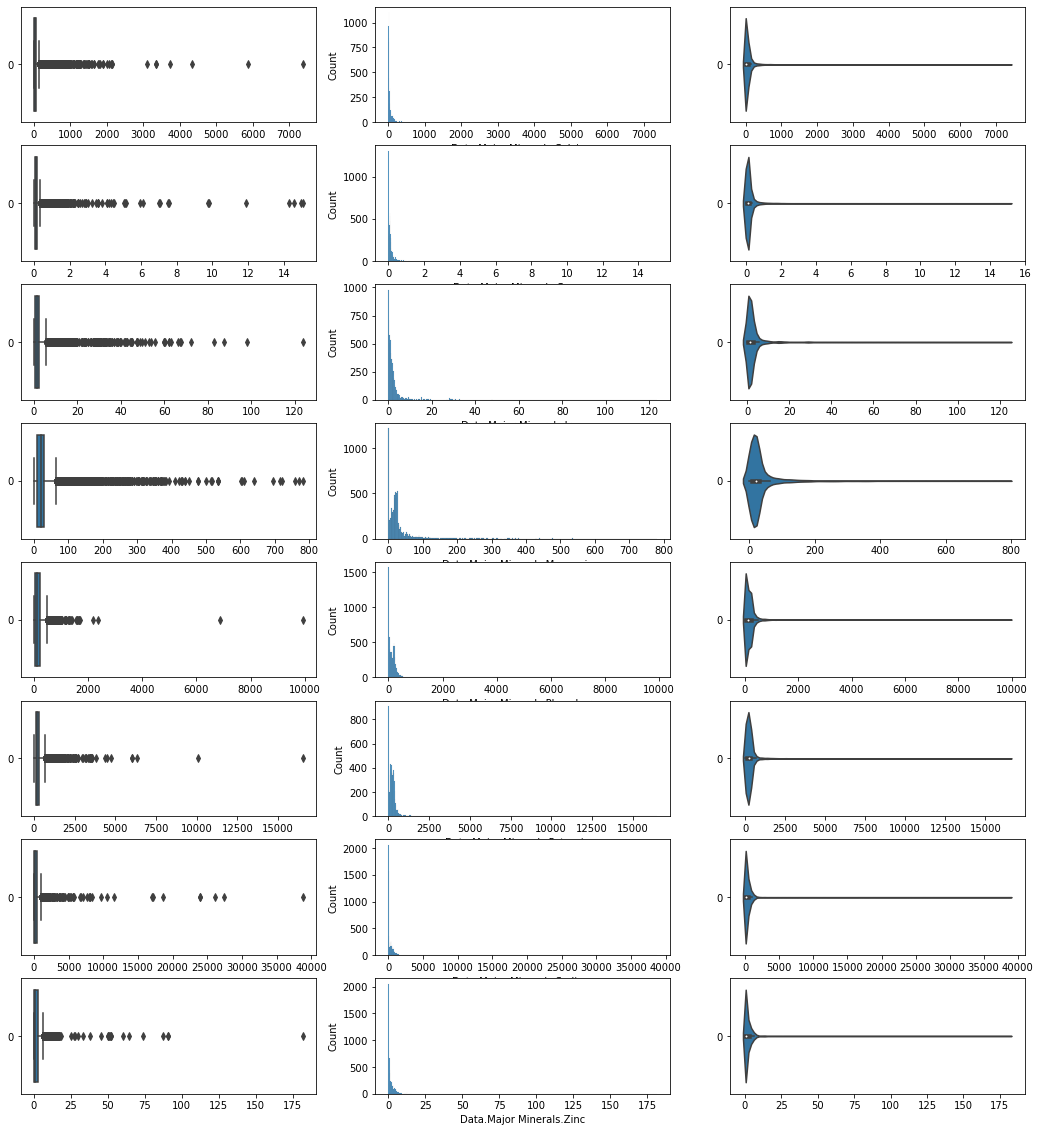

In [27]:
# Draw the distributions of all variables
f, axes = plt.subplots(8, 3, figsize=(18, 20))

count = 0
for var in MineralData:
    sns.boxplot(data = MineralData[var], orient = "h", ax = axes[count,0])
    sns.histplot(data = MineralData[var], ax = axes[count,1])
    sns.violinplot(data = MineralData[var], orient = "h", ax = axes[count,2])
    count += 1

We shall remove the all the rows with any mineral content of 0.

In [28]:
mineraldata2 = MineralData[(MineralData != 0).all(1)]
len(mineraldata2)
mineraldata2.describe()

,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc
count,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000,6100.000000
mean,79.709672,0.217647,3.079046,39.405574,174.216885,306.689672,310.964590,2.187623
std,225.451246,0.593584,6.437984,61.066607,223.675186,429.003759,690.842775,4.410224
min,1.000000,0.001000,0.010000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,11.000000,0.062000,0.680000,14.000000,58.000000,140.000000,36.000000,0.400000
50%,24.000000,0.100000,1.440000,22.000000,153.000000,240.000000,79.000000,1.100000
75%,68.000000,0.190000,2.662500,34.000000,221.000000,343.250000,416.250000,2.890000
max,7364.000000,15.050000,123.600000,781.000000,9918.000000,16500.000000,26050.000000,181.610000


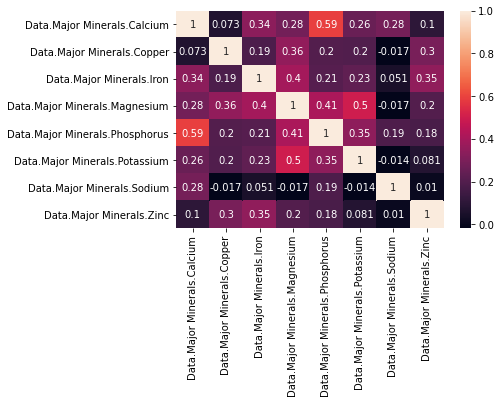

In [29]:
corrMatrix = mineraldata2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Highest correlation is phosphorous and calcium with 0.59, followed by potassium and magnesium with 0.5.

Lets find out the outliers of categories with higher mineral content compared to other categories

In [30]:
# Calculate the quartiles
Q1 = mineraldata2.quantile(0.25)
Q3 = mineraldata2.quantile(0.75)

# Rule to identify outliers
rule = ((mineraldata2 <= (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule 

,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc
1,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,False,True
4,False,True,True,True,True,True,True,True
5,False,True,True,True,True,True,True,True
6,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
7408,True,True,True,True,True,True,True,True
7409,True,True,True,True,True,True,False,True
7410,True,True,True,True,True,True,True,True
7411,True,False,True,False,True,True,True,True


In [31]:
# Find the rows where ALL column is True
non_outliers = rule.all(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
non_outliers
# Which row indices correspond to outliers in the dataframe?
nonoutlierindices = non_outliers.index[non_outliers == True]
nonoutlierindices

Int64Index([   1,   11,   12,   13,   14,   15,   16,   30,   48,   49,
            ...
            7388, 7389, 7391, 7394, 7400, 7401, 7407, 7408, 7410, 7412],
           dtype='int64', length=4117)

In [32]:
MinerCat = foodData[['Category','Data.Major Minerals.Calcium','Data.Major Minerals.Copper','Data.Major Minerals.Iron','Data.Major Minerals.Magnesium',
           'Data.Major Minerals.Phosphorus','Data.Major Minerals.Potassium','Data.Major Minerals.Sodium','Data.Major Minerals.Zinc']].copy()
MinerCat2 = MinerCat[(MinerCat != 0).all(1)].copy()
MinerCat2

,Category,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc
1,BUTTER,24,0.016,0.16,2,23,26,827,0.05
3,CHEESE,528,0.040,0.31,23,387,256,1395,2.66
4,CHEESE,674,0.024,0.43,24,451,136,560,2.60
5,CHEESE,184,0.019,0.50,20,188,152,629,2.38
6,CHEESE,388,0.021,0.33,20,347,187,842,2.38
...,...,...,...,...,...,...,...,...,...
7408,FROG LEGS,18,0.250,1.50,20,147,285,58,1.00
7409,MACKEREL,66,0.100,1.40,60,254,520,4450,1.10
7410,SCALLOP,115,0.300,3.00,55,338,476,265,3.00
7411,SNAIL,10,0.400,3.50,250,272,382,70,1.00


In [33]:
# Remove the outliers based on the row indices obtained above
MinerCat2.drop(axis = 0,               # 0 drops row 1 drops column
                index = nonoutlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
MinerCat2

,Category,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc
3,CHEESE,528,0.040,0.31,23,387,256,1395,2.66
4,CHEESE,674,0.024,0.43,24,451,136,560,2.60
5,CHEESE,184,0.019,0.50,20,188,152,629,2.38
6,CHEESE,388,0.021,0.33,20,347,187,842,2.38
7,CHEESE,673,0.024,0.64,22,490,93,690,2.94
...,...,...,...,...,...,...,...,...,...
7403,PUDDINGS,1512,0.854,3.87,110,174,570,3326,1.49
7404,PUDDINGS,49,0.040,0.05,17,12,18,1765,0.19
7405,PUDDINGS,143,0.038,0.38,5,2368,30,4250,0.10
7409,MACKEREL,66,0.100,1.40,60,254,520,4450,1.10


In [34]:
MinerCat2['Category'].value_counts()

CEREALS RTE    243
No Category     92
BEEF            89
PORK            89
CHEESE          61
              ... 
GELATINS         1
GARLIC           1
LUPINS           1
MOOSE            1
POTATO SOUP      1
Name: Category, Length: 445, dtype: int64

In [35]:
MinerCat2['Category'].value_counts().index.tolist()

['CEREALS RTE',
 'No Category',
 'BEEF',
 'PORK',
 'CHEESE',
 'CEREALS',
 'CANDIES',
 'OSCAR MAYER',
 'BEANS',
 'BABYFOOD',
 'LAMB',
 'FAST FOODS',
 'CRACKERS',
 'CHICKEN',
 'VEAL',
 'SAUCE',
 'BREAD',
 'PEANUTS',
 'MILK',
 'LOUIS RICH',
 'SNACKS',
 'GRANOLA BARS',
 'SOUP',
 'POTATOES',
 'POPCORN',
 'INF FORM',
 'BF',
 'CHESTNUTS',
 'POTATO CHIPS',
 'INF FORMULA',
 'TURKEY',
 'CORNMEAL',
 'COOKIES',
 'GRAVY',
 'SALMON',
 'TOFU',
 'CRAB',
 'PANCAKES',
 'RICE CAKES',
 'SOYBEANS',
 'PUDDINGS',
 "MCDONALD'S",
 'COFFEE',
 'OYSTER',
 'SALAD DRSNG',
 'PEPPERS',
 'GAME MEAT',
 'PEANUT BUTTER',
 'MUSHROOMS',
 'ENGLISH MUFFINS',
 'EGG',
 'SEAWEED',
 'WHEAT',
 'Snacks',
 'SPINACH',
 'SUNFLOWER SD KRNLS',
 'KENTUCKY FRIED CHICK',
 'BISCUITS',
 'LEAVENING AGENTS',
 'CAKE',
 'ALMONDS',
 'SPICES',
 'BOLOGNA',
 'HAM',
 'CORN FLR',
 'SESAME BUTTER',
 'FRANKFURTER',
 'CLAM',
 'LUNCHEON MEAT',
 'CORN',
 'TRAIL MIX',
 'SOY FLR',
 'TEA',
 'SEA LION',
 'MIXED NUTS',
 'MUFFINS',
 'CERLS',
 'MALTED DRK MIX',


Cereals have once again the highest occurence. This is probably due to the high number of items with Category CEREALS RTE.
We can infer from this that cereals, pork, beef and cheese generally have high mineral content. 

There is also No Category, which are items that have not been put into a category.

Now, we shall find out more about fat macronutrients.

In [36]:
FatData=foodData[['Data.Fat.Monosaturated Fat', 'Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat',
                  'Data.Fat.Total Lipid']].copy()

FatData.describe()
# Count number of zeros in all columns of FatData
for column_name in FatData.columns:
    column = FatData[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Data.Fat.Monosaturated Fat  is :  1026
Count of zeros in column  Data.Fat.Polysaturated Fat  is :  1013
Count of zeros in column  Data.Fat.Saturated Fat  is :  629
Count of zeros in column  Data.Fat.Total Lipid  is :  291


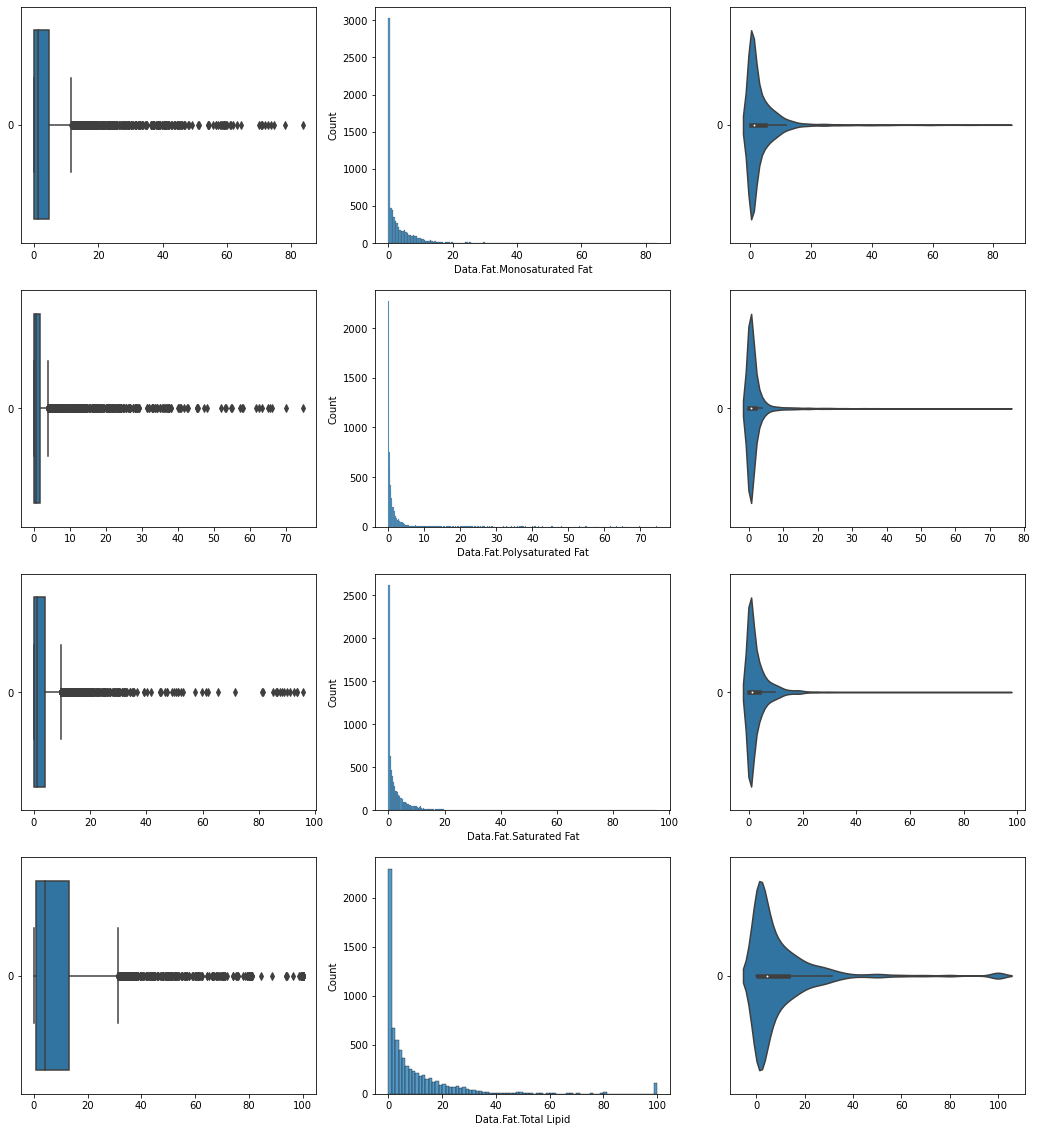

In [37]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))

count = 0
for var in FatData:
    sns.boxplot(data = FatData[var], orient = "h", ax = axes[count,0])
    sns.histplot(data = FatData[var], ax = axes[count,1])
    sns.violinplot(data = FatData[var], orient = "h", ax = axes[count,2])
    count += 1

In [38]:
fatdata2 = FatData[(FatData != 0).all(1)]
len(fatdata2)
fatdata2.describe()

,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid
count,6329.000000,6329.000000,6329.000000,6329.000000
mean,4.398941,2.283203,3.574215,11.259758
std,7.690530,5.523728,6.333352,16.967106
min,0.001000,0.001000,0.001000,0.010000
25%,0.243000,0.229000,0.246000,1.180000
50%,1.798000,0.710000,1.551000,5.330000
75%,5.513000,1.930000,4.384000,14.380000
max,83.594000,74.623000,92.614000,100.000000


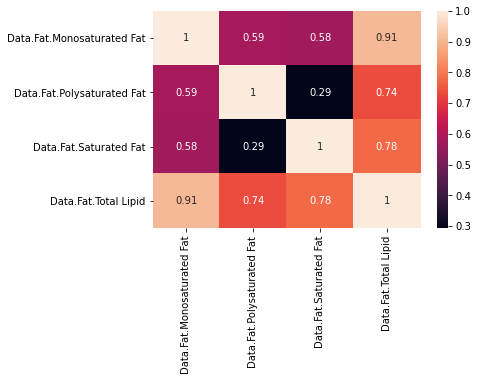

In [39]:
corrMatrix = fatdata2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Generally have high correlation between fat macronutrients, other than correlation of 0.29 between Saturated Fat and Polysaturated Fat. Highest is 0.91 between Total Lipid and Monosaturated Fat. Total lipid have very high correlations between every other fat macronutrients, 0.91, 0.74 and 0.78.

In [40]:
# Calculate the quartiles
Q1 = fatdata2.quantile(0.25)
Q3 = fatdata2.quantile(0.75)

# Rule to identify outliers
rule = ((fatdata2 <= (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule 

,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,True,True,False,True
4,True,True,False,True
...,...,...,...,...
7408,True,True,True,True
7409,True,False,True,True
7410,True,True,True,True
7411,True,True,True,True


In [41]:
# Find the rows where ALL column is True
non_outliers = rule.all(axis = 1)   # axis 0 is row, 1 is column

# Check the outliers -- it's a boolean Series
non_outliers
# Which row indices correspond to outliers in the dataframe?
nonoutlierindices = non_outliers.index[non_outliers == True]
nonoutlierindices

Int64Index([  11,   12,   13,   14,   15,   27,   35,   36,   48,   53,
            ...
            7400, 7402, 7403, 7404, 7405, 7407, 7408, 7410, 7411, 7412],
           dtype='int64', length=5330)

In [42]:
FatCat = foodData[['Category','Data.Fat.Monosaturated Fat','Data.Fat.Polysaturated Fat', 'Data.Fat.Saturated Fat',
                   'Data.Fat.Total Lipid']].copy()
FatCat2 = FatCat[(FatCat != 0).all(1)].copy()
FatCat2

,Category,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid
0,BUTTER,21.021,3.043,51.368,81.11
1,BUTTER,23.426,3.012,50.489,81.11
2,BUTTER OIL,28.732,3.694,61.924,99.48
3,CHEESE,7.778,0.800,18.669,28.74
4,CHEESE,8.598,0.784,18.764,29.68
...,...,...,...,...,...
7408,FROG LEGS,0.053,0.102,0.076,0.30
7409,MACKEREL,8.320,6.210,7.148,25.10
7410,SCALLOP,0.068,0.481,0.146,1.40
7411,SNAIL,0.259,0.252,0.361,1.40


In [43]:
# Remove the outliers based on the row indices obtained above
FatCat2.drop(axis = 0,               # 0 drops row 1 drops column
                index = nonoutlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
FatCat2

,Category,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid
0,BUTTER,21.021,3.043,51.368,81.11
1,BUTTER,23.426,3.012,50.489,81.11
2,BUTTER OIL,28.732,3.694,61.924,99.48
3,CHEESE,7.778,0.800,18.669,28.74
4,CHEESE,8.598,0.784,18.764,29.68
...,...,...,...,...,...
7392,CHEESE,4.844,0.509,10.867,17.10
7393,MAYONNAISE DRSNG,18.026,45.539,10.784,77.80
7394,SALAD DRSNG,9.000,18.000,5.000,33.40
7395,OIL,48.033,33.033,14.367,100.00


In [44]:
FatCat2['Category'].value_counts().index.tolist()

['CANDIES',
 'OIL',
 'CHEESE',
 'BEEF',
 'No Category',
 'COOKIES',
 'PORK',
 'SALAD DRSNG',
 'LAMB',
 'MARGARINE',
 'CHICKEN',
 'PIE CRUST',
 'PEANUTS',
 'FAST FOODS',
 "MCDONALD'S",
 'SNACKS',
 'OSCAR MAYER',
 'INF FORM',
 'POTATO CHIPS',
 'CEREALS RTE',
 'SHORTENING',
 'GRANOLA BARS',
 'MARGARINE-LIKE SPRD',
 'INF FORMULA',
 'TURKEY',
 'MUFFINS',
 'CRACKERS',
 'TOFU',
 'PEANUT BUTTER',
 'COCONUT MEAT',
 'SUNFLOWER SD KRNLS',
 'SOYBEANS',
 'VEGETABLE OIL',
 'FAT',
 'ALMONDS',
 'CORN-BASED',
 'SESAME BUTTER',
 'CREAM',
 'MIXED NUTS',
 'TRAIL MIX',
 'FISH OIL',
 'POPCORN',
 'BUTTER',
 'Snacks',
 'PECANS',
 'USDA CMDTY FD',
 'CASHEW NUTS',
 'CHEESE FD',
 'LUNCHEON MEAT',
 'NUTS',
 'DESSERT TOPPING',
 'PIE',
 'BURGER KING',
 'KENTUCKY FRIED CHICK',
 'MAYONNAISE',
 'FORMULATED',
 'MACADAMIA NUTS',
 'PISTACHIO NUTS',
 'SOY FLR',
 'COCONUT MILK',
 'CAKE',
 'SESAME SD KRNLS',
 'VEAL',
 "KELLOGG'S POP-TARTS PASTRY SWIRLS",
 'CHEESE SPRD',
 'SAUSAGE',
 'VEGETABLE OIL-BUTTER SPRD',
 'POPEYES',


These are the food categories with high fat content. CANDIES being the highest occurence.
OIL and FAST FOODS have high fat content.
SALAD DRSNG meaning salad dressing also have high fat content, hence we should avoid adding it into our salad if we are trying to diet.

In [45]:
foodData.corr().abs()['Data.Kilocalories'].sort_values(ascending = False)

Data.Kilocalories                              1.000000
Data.Water                                     0.891119
Data.Fat.Total Lipid                           0.806302
Data.Fat.Monosaturated Fat                     0.699305
Data.Fat.Saturated Fat                         0.612858
Data.Fat.Polysaturated Fat                     0.585958
Data.Carbohydrate                              0.452811
Data.Vitamins.Vitamin E                        0.289244
Data.Sugar Total                               0.280782
Data.Major Minerals.Magnesium                  0.270094
Data.Major Minerals.Phosphorus                 0.216918
Data.Niacin                                    0.206224
Data.Major Minerals.Iron                       0.200899
Data.Fiber                                     0.178744
Data.Riboflavin                                0.172956
Data.Thiamin                                   0.167750
Data.Vitamins.Vitamin B6                       0.163510
Data.Protein                                   0

Kilocalories have a strong correlation with Water(0.89) followed by Fat macronutrients(0.59 to 0.81) and then Carbohydrate(0.45).
This can show that food with higher fat content generally have higher calories.

In [46]:
foodData.corr().abs()['Data.Cholesterol'].sort_values(ascending = False)

Data.Cholesterol                               1.000000
Data.Choline                                   0.368678
Data.Vitamins.Vitamin B12                      0.292874
Data.Protein                                   0.270320
Data.Selenium                                  0.196820
Data.Carbohydrate                              0.195869
Data.Retinol                                   0.160844
Data.Pantothenic Acid                          0.151953
Data.Vitamins.Vitamin A - RAE                  0.151541
Data.Major Minerals.Phosphorus                 0.134982
Data.Fiber                                     0.134047
Data.Sugar Total                               0.116053
Data.Fat.Saturated Fat                         0.105390
Data.Fat.Total Lipid                           0.101235
Data.Refuse Percentage                         0.099210
Data.Riboflavin                                0.097245
Data.Major Minerals.Copper                     0.093929
Data.Fat.Monosaturated Fat                     0

Cholesterol have generally weak correlation between other macronutrients, the highest being 0.37 with Choline followed by Vitamin B12(0.29) and Protein(0.27).

This is the end of our EDA for this food dataset.